In [215]:
print("Images Classification using CNN")

Images Classification using CNN


In [154]:
import os
import zipfile
import tensorflow as tf
import random as rand
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Model
import cv2 #computer vision
import matplotlib.image as mpimage
from google.colab import drive
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Layer,MaxPooling2D
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input



In [155]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [156]:
#!unzip -u "/content/gdrive/My Drive/6 image classification.zip" -d "/content/gdrive/My Drive/NewFolder"

!unzip file_location -d file_destination , 'u' helps incase the  colab shuts to resume without reuploading the already unzipped files and 'd' is the destination directory. Can also  First create a new directory:
!mkdir file_destination , and then run the above the code.

In [157]:
train_buildings = os.listdir(r"/content/gdrive/My Drive/NewFolder/seg_train/seg_train/buildings")
train_forest = os.listdir(r"/content/gdrive/My Drive/NewFolder/seg_train/seg_train/forest")
train_glacier = os.listdir(r"/content/gdrive/My Drive/NewFolder/seg_train/seg_train/glacier")
train_mountain = os.listdir(r"/content/gdrive/My Drive/NewFolder/seg_train/seg_train/mountain")
train_sea = os.listdir(r"/content/gdrive/My Drive/NewFolder/seg_train/seg_train/sea")
train_street = os.listdir(r"/content/gdrive/My Drive/NewFolder/seg_train/seg_train/street")

In [158]:
test_buildings = os.listdir(r"/content/gdrive/My Drive/NewFolder/seg_test/seg_test/buildings")
test_forest = os.listdir(r"/content/gdrive/My Drive/NewFolder/seg_test/seg_test/forest")
test_glacier = os.listdir(r"/content/gdrive/My Drive/NewFolder/seg_test/seg_test/glacier")
test_mountain = os.listdir(r"/content/gdrive/My Drive/NewFolder/seg_test/seg_test/mountain")
test_sea = os.listdir(r"/content/gdrive/My Drive/NewFolder/seg_test/seg_test/sea")
test_street = os.listdir(r"/content/gdrive/My Drive/NewFolder/seg_test/seg_test/street")

In [ ]:
train_buildings # is a list of images

In [160]:
len(train_buildings)

2191

In [161]:
train_buildings[1]

'19466.jpg'

In [162]:
len(train_forest)

2271

In [163]:
len(train_glacier)

2404

In [164]:
len(train_sea)

2274

In [165]:
len(train_street)

2382

In [166]:
train_data= []
for i in train_buildings:
  train_data.append([i,0,])#its a list not a dataframe, this must be enumerating for labels
for i in train_forest:
  train_data.append([i,1])
for i in train_glacier:
  train_data.append([i,2])
for i in train_mountain:
  train_data.append([i,2])
for i in train_sea:
  train_data.append([i,3])
for i in train_street:
  train_data.append([i,4])

In [167]:
len(train_data)

14034

In [168]:
#shuffling the data
rand.shuffle(train_data)

In [169]:
train_data = pd.DataFrame(train_data , columns = ['images','label'])

In [170]:
train_data.head()

,images,label
0,239.jpg,3
1,18430.jpg,2
2,15988.jpg,0
3,9971.jpg,2
4,13225.jpg,1


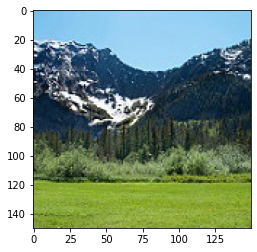

In [171]:
img = plt.imread(r"/content/gdrive/My Drive/NewFolder/seg_train/seg_train/mountain/1278.jpg")
#Read an image from a file into an array.
plt.imshow(img)
plt.show()

In [172]:
img.shape

(150, 150, 3)

In [173]:
img.dtype

dtype('uint8')

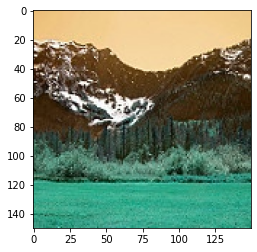

In [174]:
img = cv2.imread(r"/content/gdrive/My Drive/NewFolder/seg_train/seg_train/mountain/1278.jpg")
#Read an image from a file into an array.
plt.imshow(img)
plt.show()

CV2 reads the image in BGR and plt reads in RGB

In [175]:
img.shape

(150, 150, 3)

In [176]:
img.dtype

dtype('uint8')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


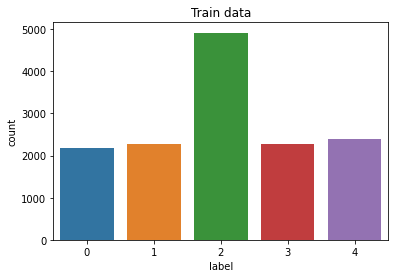

In [177]:
plt.subplot(1,1,1)
sns.countplot(train_data['label'])
plt.title('Train data')
plt.show()

In [178]:
'''x = []
y = []

for i in os.listdir(r"/content/gdrive/My Drive/NewFolder/seg_train/seg_train/"):
  for j in os.listdir(r"/content/gdrive/My Drive/NewFolder/seg_train/seg_train/"+i+'/'):
     img = plt.imread("/content/gdrive/My Drive/NewFolder/seg_train/seg_train/"+i +'/'+j)
     img = cv2.resize(img,(256,256))
     x.append(img)
     y.append(i)'''
 

'x = []\ny = []\n\nfor i in os.listdir(r"/content/gdrive/My Drive/NewFolder/seg_train/seg_train/"):\n  for j in os.listdir(r"/content/gdrive/My Drive/NewFolder/seg_train/seg_train/"+i+\'/\'):\n     img = plt.imread("/content/gdrive/My Drive/NewFolder/seg_train/seg_train/"+i +\'/\'+j)\n     img = cv2.resize(img,(256,256))\n     x.append(img)\n     y.append(i)'

In [179]:
x = []
y = []



for i in range(100):
    img = plt.imread("/content/gdrive/My Drive/NewFolder/seg_train/seg_train/buildings/" + train_buildings[i])
    img = cv2.resize(img,(256,256))
    x.append(img)
    y.append(0)

for i in range(100):
    img = plt.imread("/content/gdrive/My Drive/NewFolder/seg_train/seg_train/forest/" + train_forest[i])
    img = cv2.resize(img,(256,256))
    x.append(img)
    y.append(1)

for i in range(100):
    img = plt.imread("/content/gdrive/My Drive/NewFolder/seg_train/seg_train/glacier/" + train_glacier[i])
    img = cv2.resize(img,(256,256))
    x.append(img)
    y.append(2)
    
for i in range(100):
    img = plt.imread("/content/gdrive/My Drive/NewFolder/seg_train/seg_train/mountain/" + train_mountain[i])
    img = cv2.resize(img,(256,256))
    x.append(img)
    y.append(3)

for i in range(100):
    img = plt.imread("/content/gdrive/My Drive/NewFolder/seg_train/seg_train/sea/" + train_sea[i])
    img = cv2.resize(img,(256,256))
    x.append(img)
    y.append(4)

for i in range(100):
    img = plt.imread("/content/gdrive/My Drive/NewFolder/seg_train/seg_train/street/" + train_street[i])
    img = cv2.resize(img,(256,256))
    x.append(img)
    y.append(5)



In [180]:
x1 = []
y1 = []

for i in range(25):
    img = plt.imread("/content/gdrive/My Drive/NewFolder/seg_test/seg_test/buildings/"+ test_buildings[i])
    img = cv2.resize(img,(256,256))
    x1.append(img)
    y1.append(0)

for i in range(25):
    img = plt.imread("/content/gdrive/My Drive/NewFolder/seg_test/seg_test/forest/" + test_forest[i])
    img = cv2.resize(img,(256,256))
    x1.append(img)
    y1.append(1)

for i in range(25):
    img = plt.imread("/content/gdrive/My Drive/NewFolder/seg_test/seg_test/glacier/" + test_glacier[i])
    img = cv2.resize(img,(256,256))
    x1.append(img)
    y1.append(2)
    
for i in range(25):
    img = plt.imread("/content/gdrive/My Drive/NewFolder/seg_test/seg_test/mountain/" + test_mountain[i])
    img = cv2.resize(img,(256,256))
    x1.append(img)
    y1.append(3)

for i in range(25):
    img = plt.imread("/content/gdrive/My Drive/NewFolder/seg_test/seg_test/sea/" + test_sea[i])
    img = cv2.resize(img,(256,256))
    x1.append(img)
    y1.append(4)

for i in range(25):
    img = plt.imread("/content/gdrive/My Drive/NewFolder/seg_test/seg_test/street/" + test_street[i])
    img = cv2.resize(img,(256,256))
    x1.append(img)
    y1.append(5)


In [181]:
x = np.array(x)


In [182]:
x1 = np.array(x1)

In [183]:
x.shape

(600, 256, 256, 3)

In [184]:
x1.shape

(150, 256, 256, 3)

In [185]:
y = np.array(y)
y1 = np.array(y1)

In [186]:
y.shape

(600,)

In [187]:
y1.shape

(150,)

In [188]:
y = np_utils.to_categorical(y,6)
y1 = np_utils.to_categorical(y1,6)

In [189]:
y

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [190]:
x = (x/255)#.astype(np.float16) 
x1 = (x1/255)#.astype(np.float16)

 If you divide an int data type of a NumPy array, by default, it is typecasted to float64. Generally, 'float64' contains a larger memory. Therefore while dividing a int type NumPy matrix, one should always typecase to shorter datatypes for larger datasets.

If the code you executed fluently runs without the img /= 255.0 block, then this is the case. After dividing, you should typecast the img variable to the lowest possible float types, such as, np.float16 or np.float32. However, np.float16 has some limitations and it is not fully supported by TensorFlow (TF converts it to 32-bit float), you may use np.float32 datatype.

Therefore, try adding img.astype(np.float16) or img.astype(np.float32) after the line img /= 255.0.

In [191]:
x = tf.image.resize(x,[224,224])
x1 = tf.image.resize(x1,[224,224])

In [192]:
x.shape

TensorShape([600, 224, 224, 3])

Tranfer learning using VGG16


In [193]:
#loading the vgg model and include_top = True will keep the dense layers which is after the bottleneck layer as it is
vgg = VGG16(include_top = True, weights = 'imagenet')

In [194]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [195]:
#we don't want our vgg network weights to get retrained we want the weights as it is
for layer in vgg.layers:
    layer.trainable = False

In [196]:
#taking the vgg input from first input layer and till the last dense layer and adding our own output layer based on our custom model
vgg_input = vgg.layers[0].input
vgg_output = vgg.layers[-2].output
predictions = Dense(6)(vgg_output)

In [197]:
#creating our new model
model = Model(inputs = vgg_input,outputs = predictions)

In [198]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [199]:
model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [200]:
model.fit(x,y, epochs = 10)

Epoch 1/10
19/19 [==============================] - 3s 142ms/step - loss: 4.1815 - accuracy: 0.1546
Epoch 2/10
19/19 [==============================] - 3s 141ms/step - loss: 4.2776 - accuracy: 0.1633
Epoch 3/10
19/19 [==============================] - 3s 144ms/step - loss: 4.3584 - accuracy: 0.1475
Epoch 4/10
19/19 [==============================] - 3s 145ms/step - loss: 4.3088 - accuracy: 0.1572
Epoch 5/10
19/19 [==============================] - 3s 147ms/step - loss: 4.1504 - accuracy: 0.1882
Epoch 6/10
19/19 [==============================] - 3s 148ms/step - loss: 4.3186 - accuracy: 0.1553
Epoch 7/10
19/19 [==============================] - 3s 147ms/step - loss: 4.2551 - accuracy: 0.1677
Epoch 8/10
19/19 [==============================] - 3s 145ms/step - loss: 4.3338 - accuracy: 0.1523
Epoch 9/10
19/19 [==============================] - 3s 143ms/step - loss: 4.2005 - accuracy: 0.1784
Epoch 10/10
19/19 [==============================] - 3s 142ms/step - loss: 4.2676 - accuracy: 0.1652

In [201]:
model.evaluate(x1,y1)

5/5 [==============================] - 1s 134ms/step - loss: 4.2603 - accuracy: 0.1667


[4.260303497314453, 0.1666666716337204]

Contructing a CNN architecture 1

In [202]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (224, 224, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [203]:
model1.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 54, 54, 32)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 93312)             0         
_________________________________________________________________
dense_35 (Dense)             (None, 128)               11944064  
_________________________________________________________________
dense_36 (Dense)             (None, 6)               

In [204]:
model1.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [205]:
history = model1.fit(x,y, batch_size =100, epochs = 12)

Epoch 1/12
6/6 [==============================] - 1s 97ms/step - loss: 8.5976 - accuracy: 0.1514
Epoch 2/12
6/6 [==============================] - 1s 93ms/step - loss: 2.2331 - accuracy: 0.2333
Epoch 3/12
6/6 [==============================] - 1s 98ms/step - loss: 1.6447 - accuracy: 0.2662
Epoch 4/12
6/6 [==============================] - 1s 98ms/step - loss: 1.5716 - accuracy: 0.3069
Epoch 5/12
6/6 [==============================] - 1s 96ms/step - loss: 1.4605 - accuracy: 0.3845
Epoch 6/12
6/6 [==============================] - 1s 91ms/step - loss: 1.2987 - accuracy: 0.4469
Epoch 7/12
6/6 [==============================] - 1s 92ms/step - loss: 1.0317 - accuracy: 0.6332
Epoch 8/12
6/6 [==============================] - 1s 96ms/step - loss: 0.8202 - accuracy: 0.7000
Epoch 9/12
6/6 [==============================] - 1s 98ms/step - loss: 0.6966 - accuracy: 0.7947
Epoch 10/12
6/6 [==============================] - 1s 97ms/step - loss: 0.5249 - accuracy: 0.8463
Epoch 11/12
6/6 [============

In [206]:
#evaluating our test data
model1.evaluate(x1,y1)

5/5 [==============================] - 0s 12ms/step - loss: 1.3042 - accuracy: 0.5933


[1.3041671514511108, 0.5933333039283752]

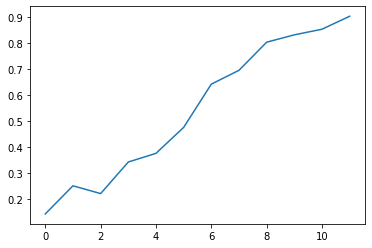

In [207]:
#plotting our accuracy
plt.plot(history.history['accuracy'])

Constructing a CNN architecture 2

In [208]:
model2 = Sequential()
model2.add(Conv2D(32,(3,3),activation='relu',input_shape = (224,224,3)))  #building a convolution layer by giving the input no.of kernels and kernel size and the input shape
model2.add(MaxPooling2D(2,2)) # Adding the maxpooling layer to extract the features as well as to reduce the size of the image
model2.add(Conv2D(16,(3,3),activation='relu')) # adding the 2nd Conv layer
model2.add(MaxPooling2D(2,2))
model2.add(Flatten())  #flatten will reshape our n dim array to 1d vector. The input require for the fully connected neural network
model2.add(Dense(64,activation='relu')) #fully connected layer
model2.add(Dense(32,activation='relu'))
model2.add(Dense(6,activation='softmax')) #output layer

In [209]:
model2.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 109, 109, 16)      4624      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 54, 54, 16)        0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 46656)             0         
_________________________________________________________________
dense_37 (Dense)             (None, 64)                2986048   
_________________________________________________________________
dense_38 (Dense)             (None, 32)              

In [210]:
model2.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [211]:
#history = model1.fit(x,y, batch_size =101, epochs = 10)

model2.fit(x, y, validation_data=(x1,y1), epochs=10, batch_size=100)

Epoch 1/10
6/6 [==============================] - 1s 137ms/step - loss: 1.9816 - accuracy: 0.2088 - val_loss: 1.7024 - val_accuracy: 0.2200
Epoch 2/10
6/6 [==============================] - 1s 106ms/step - loss: 1.6756 - accuracy: 0.2991 - val_loss: 1.5560 - val_accuracy: 0.3400
Epoch 3/10
6/6 [==============================] - 1s 108ms/step - loss: 1.4849 - accuracy: 0.4213 - val_loss: 1.4146 - val_accuracy: 0.4200
Epoch 4/10
6/6 [==============================] - 1s 110ms/step - loss: 1.3444 - accuracy: 0.4884 - val_loss: 1.2929 - val_accuracy: 0.5667
Epoch 5/10
6/6 [==============================] - 1s 109ms/step - loss: 1.1504 - accuracy: 0.5759 - val_loss: 1.2539 - val_accuracy: 0.5400
Epoch 6/10
6/6 [==============================] - 1s 106ms/step - loss: 1.0608 - accuracy: 0.6232 - val_loss: 1.1330 - val_accuracy: 0.6000
Epoch 7/10
6/6 [==============================] - 1s 106ms/step - loss: 0.9295 - accuracy: 0.6562 - val_loss: 1.0756 - val_accuracy: 0.6067
Epoch 8/10
6/6 [====

In [212]:
model2.evaluate(x1,y1)

5/5 [==============================] - 0s 11ms/step - loss: 1.0542 - accuracy: 0.6400


[1.0541541576385498, 0.6399999856948853]